In [78]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex,plot_bloch_vector
from qiskit.extensions import Initialize


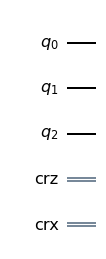

In [87]:
qreg_q = QuantumRegister(3, 'q')
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
circuit = QuantumCircuit(qreg_q, crz,crx)
circuit.draw('mpl')

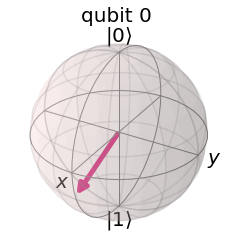

In [88]:
plot_bloch_multivector([(1/3)**0.5 , (2/3)**0.5])

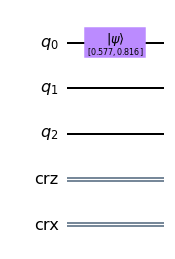

In [89]:
circuit.initialize([(1/3)**0.5 , (2/3)**0.5],0)

circuit.draw('mpl')

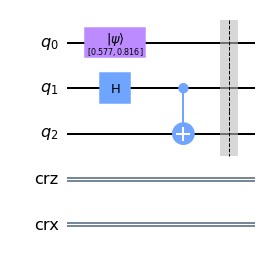

In [90]:
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.barrier(qreg_q[1], qreg_q[0], qreg_q[2])
circuit.draw('mpl')

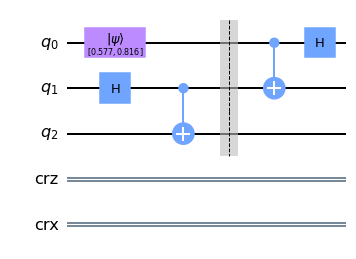

In [91]:
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.draw('mpl')

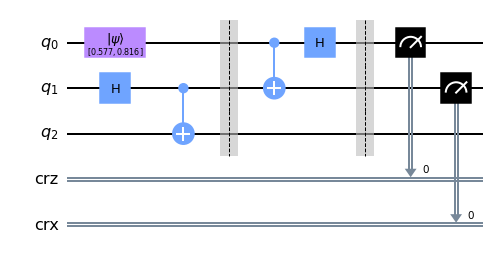

In [92]:
circuit.barrier(qreg_q[1], qreg_q[0], qreg_q[2])
circuit.measure(qreg_q[0], crz)
circuit.measure(qreg_q[1], crx)
circuit.draw('mpl')

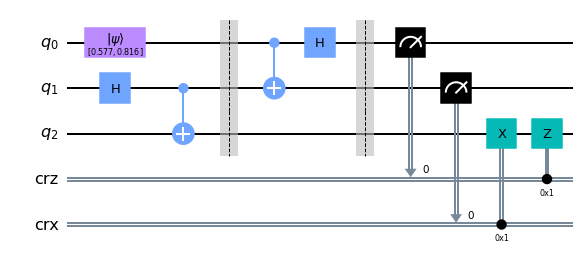

In [93]:
circuit.x(qreg_q[2]).c_if(crx, 1)
circuit.z(qreg_q[2]).c_if(crz, 1)
circuit.draw('mpl')

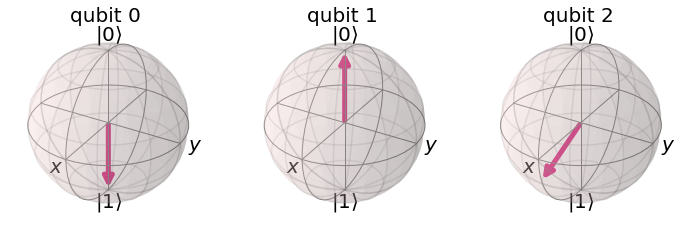

In [94]:
sim = Aer.get_backend('aer_simulator')
circuit.save_statevector()
out_vector = sim.run(circuit).result().get_statevector()
plot_bloch_multivector(out_vector)